# Representación de Números en Punto Flotante

La representación de números en punto flotante es un método crucial en computación para aproximar números reales y realizar operaciones aritméticas. Es una adaptación de la notación científica para uso eficiente en computadoras, generalmente siguiendo el estándar IEEE 754.

## Componentes de un Número en Punto Flotante

Un número en punto flotante consta de tres partes:

1. **Signo (s)**: 1 bit
   - 0 para positivo
   - 1 para negativo

2. **Exponente (e)**: 8 bits (simple precisión) o 11 bits (doble precisión)
   - Representa el exponente en base 2

3. **Mantisa (m)**: 23 bits (simple precisión) o 52 bits (doble precisión)
   - Representa la parte fraccionaria

### Fórmula General

$$(-1)^s \times 1.m \times 2^{(e - \text{Bias})}$$

Donde:
- $(-1)^s$ es el signo
- $1.m$ es la mantisa normalizada
- $2^{(e - \text{Bias})}$ es el factor de escala

## Estándar IEEE 754

| Formato | Tamaño Total | Signo | Exponente | Mantisa |
|---------|--------------|-------|-----------|---------|
| Simple  | 32 bits      | 1 bit | 8 bits    | 23 bits |
| Doble   | 64 bits      | 1 bit | 11 bits   | 52 bits |

## Ejemplos Prácticos

### 1. Representación de 0.1 en Binario

0.1 en binario es una fracción periódica:

```
0.0001100110011001100110011001100110011001100110011...
```

En punto flotante de precisión simple, se aproxima a:

```
s = 0
e = 01111011 (123 en decimal, que corresponde a -4 después de restar el bias)
m = 10011001100110011001101
```

### 2. Demostración en Python


In [1]:
import struct

def float_to_binary(num):
    # Convierte un float a su representación binaria IEEE 754
    binary = bin(struct.unpack('!I', struct.pack('!f', num))[0])[2:].zfill(32)
    return f"Signo: {binary[0]}, Exponente: {binary[1:9]}, Mantisa: {binary[9:]}"

print(float_to_binary(0.1))
print(f"0.1 + 0.2 = {0.1 + 0.2}")
print(f"¿Es 0.1 + 0.2 exactamente igual a 0.3? {0.1 + 0.2 == 0.3}")

Signo: 0, Exponente: 01111011, Mantisa: 10011001100110011001101
0.1 + 0.2 = 0.30000000000000004
¿Es 0.1 + 0.2 exactamente igual a 0.3? False



## Consideraciones Importantes

1. **Rango y Precisión**: 
   - Limitados por el número de bits disponibles
   - Pueden ocurrir errores de redondeo

2. **Valores Especiales**:
   - Cero: Exponente todo ceros, mantisa todo ceros
   - Infinito (∞): Exponente todo unos, mantisa todo ceros
   - NaN (Not a Number): Exponente todo unos, mantisa no todo ceros

3. **Errores de Redondeo**:
   - Las operaciones aritméticas pueden acumular errores
   - Ejemplo: 0.1 + 0.2 ≠ 0.3 exactamente en la mayoría de los sistemas

## Conclusión

La representación en punto flotante es fundamental en computación, pero es importante entender sus limitaciones para evitar errores sutiles en cálculos numéricos.

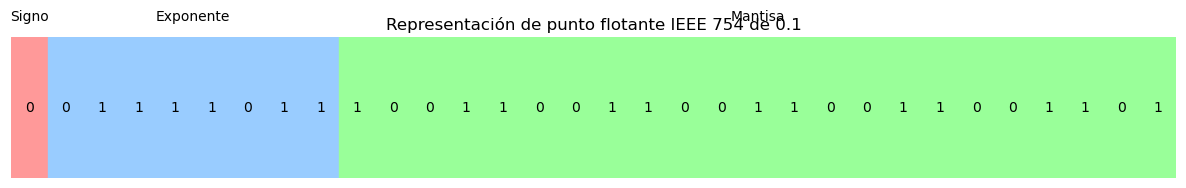

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def float_to_binary(num):
    return ''.join(bin(c).replace('0b', '').rjust(8, '0') for c in struct.pack('!f', num))

def plot_float_representation(num):
    binary = float_to_binary(num)
    
    fig, ax = plt.subplots(figsize=(12, 2))
    
    # Colores para cada sección
    colors = ['#FF9999', '#99CCFF', '#99FF99']
    labels = ['Signo', 'Exponente', 'Mantisa']
    sizes = [1, 8, 23]
    
    start = 0
    for size, color, label in zip(sizes, colors, labels):
        for i in range(size):
            ax.add_patch(plt.Rectangle((start + i, 0), 1, 1, fill=True, color=color))
            ax.text(start + i + 0.5, 0.5, binary[start + i], ha='center', va='center')
        
        ax.text(start + size/2, 1.1, label, ha='center', va='bottom')
        start += size
    
    ax.set_xlim(0, 32)
    ax.set_ylim(0, 1)
    ax.axis('off')
    
    plt.title(f"Representación de punto flotante IEEE 754 de {num}")
    plt.tight_layout()
    plt.show()

# Ejemplo con el número 0.1
plot_float_representation(0.1)

In [3]:
import struct  # Importa el módulo para trabajar con bytes

def float_to_binary64(number):
    """Convierte un número flotante a su representación binaria según IEEE 754."""
    # Empaqueta el número flotante en un objeto de bytes
    packed = struct.pack('!d', number)

    # Convierte cada byte a su representación entera
    integers = [c for c in packed]

    # Convierte cada entero a su representación binaria, rellenando con ceros a la izquierda
    binaries = [bin(i).replace('0b', '').rjust(8, '0') for i in integers]

    # Une todas las representaciones binarias en una cadena
    return ''.join(binaries)

def split_ieee_754(binary64):
    """Divide la representación binaria IEEE 754 en sus componentes."""
    # Extrae el bit de signo (el primer bit)
    sign = binary64[0]

    # Extrae los bits del exponente (bits del 1 al 11)
    exponent = binary64[1:12]

    # Extrae los bits de la mantisa (bits del 12 en adelante)
    mantissa = binary64[12:]

    return sign, exponent, mantissa

# Convierte un número flotante a su representación binaria
number = -15.25
binary64 = float_to_binary64(number)

# Divide la representación en sus componentes IEEE 754
sign, exponent, mantissa = split_ieee_754(binary64)

# Imprime los resultados
print(f"Number: {number}")
print(f"Binary64: {binary64}")
print(f"Sign bit: {sign}")
print(f"Exponent: {exponent}")
print(f"Mantissa: {mantissa}")



Number: -15.25
Binary64: 1100000000101110100000000000000000000000000000000000000000000000
Sign bit: 1
Exponent: 10000000010
Mantissa: 1110100000000000000000000000000000000000000000000000
